# Report 03 Master Data Synthesis Table

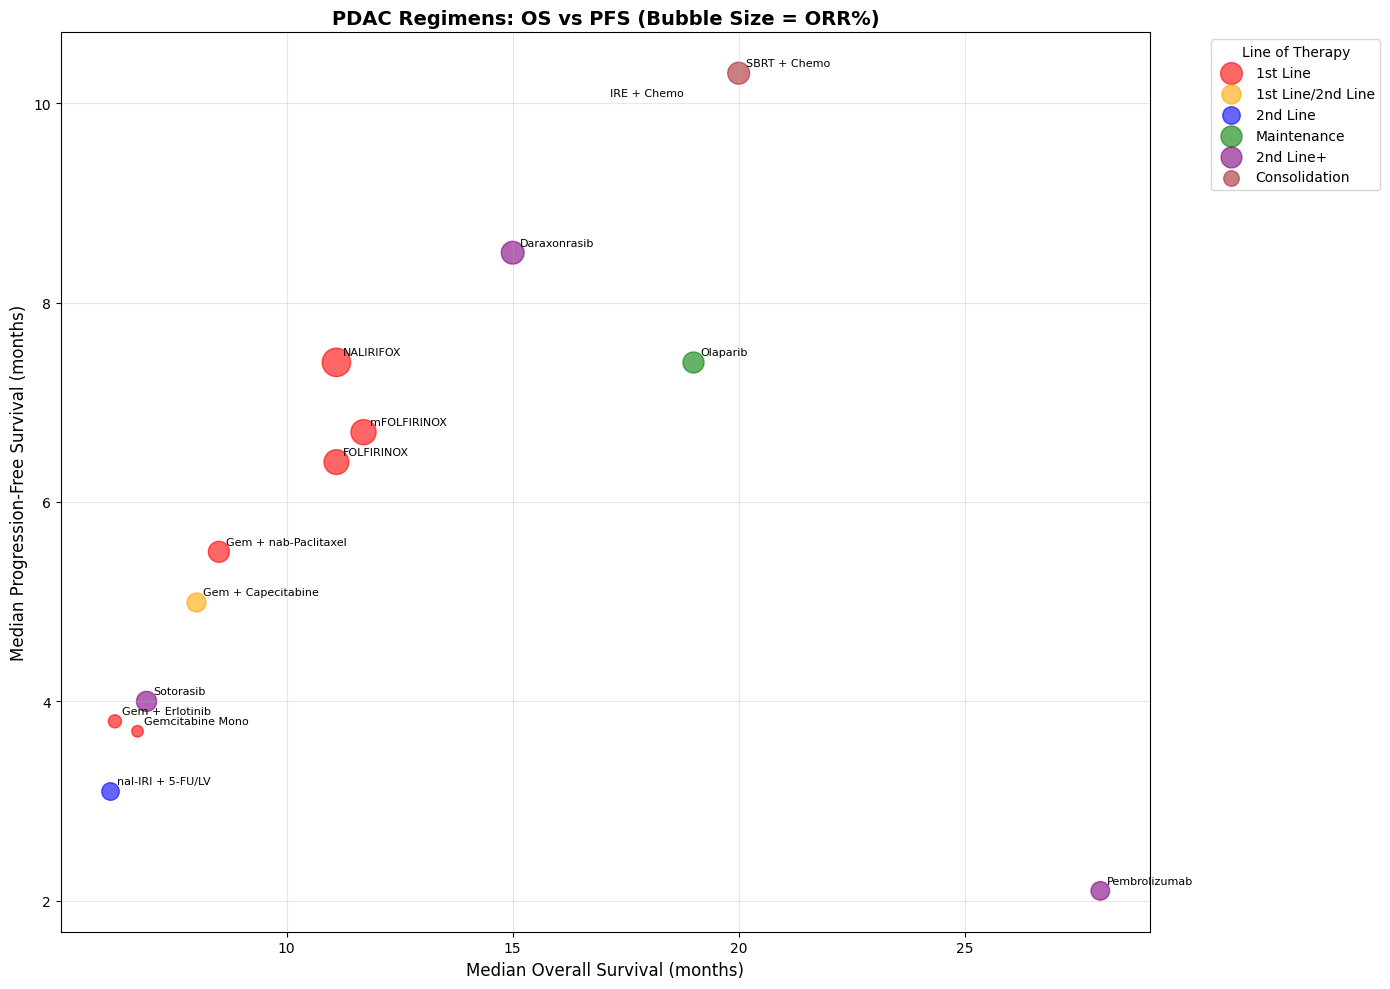

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = {
    'Regimen': ['FOLFIRINOX', 'mFOLFIRINOX', 'Gem + nab-Paclitaxel', 'NALIRIFOX',
                'Gemcitabine Mono', 'Gem + Capecitabine', 'Gem + Erlotinib',
                'nal-IRI + 5-FU/LV', 'Olaparib', 'Pembrolizumab', 'Sotorasib',
                'Daraxonrasib', 'SBRT + Chemo', 'IRE + Chemo'],
    'Median_OS': [11.1, 11.7, 8.5, 11.1, 6.7, 8.0, 6.2, 6.1, 19.0, 28.0, 6.9, 15.0, 20.0, 17.0],
    'Median_PFS': [6.4, 6.7, 5.5, 7.4, 3.7, 5.0, 3.8, 3.1, 7.4, 2.1, 4.0, 8.5, 10.3, 10.0],
    'ORR': [32, 33, 23, 42, 7, 19, 9, 16, 23, 18, 21, 27, 25, 0],
    'Line_of_Therapy': ['1st Line', '1st Line', '1st Line', '1st Line', '1st Line',
                       '1st Line/2nd Line', '1st Line', '2nd Line', 'Maintenance',
                       '2nd Line+', '2nd Line+', '2nd Line+', 'Consolidation', 'Consolidation']
}

df = pd.DataFrame(data)

# Create bubble chart
fig, ax = plt.subplots(figsize=(14, 10))

# Color mapping for therapy lines
colors = {'1st Line': 'red', '1st Line/2nd Line': 'orange', '2nd Line': 'blue',
          '2nd Line+': 'purple', 'Maintenance': 'green', 'Consolidation': 'brown'}

for therapy in df['Line_of_Therapy'].unique():
    mask = df['Line_of_Therapy'] == therapy
    ax.scatter(df[mask]['Median_OS'], df[mask]['Median_PFS'],
              s=df[mask]['ORR']*10, alpha=0.6, c=colors[therapy], label=therapy)

# Add regimen labels
for i, row in df.iterrows():
    ax.annotate(row['Regimen'], (row['Median_OS'], row['Median_PFS']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax.set_xlabel('Median Overall Survival (months)', fontsize=12)
ax.set_ylabel('Median Progression-Free Survival (months)', fontsize=12)
ax.set_title('PDAC Regimens: OS vs PFS (Bubble Size = ORR%)', fontsize=14, fontweight='bold')
ax.legend(title='Line of Therapy', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

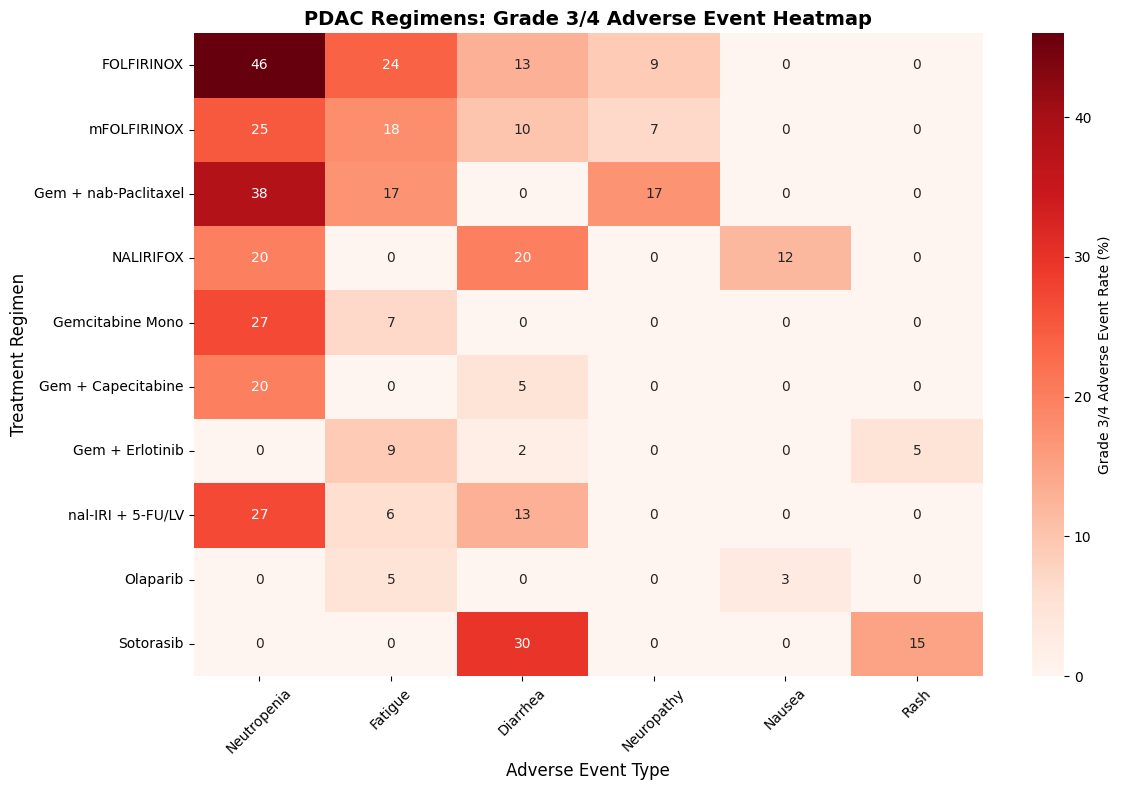

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create dataset with focus on adverse events
ae_data = {
    'Regimen': ['FOLFIRINOX', 'mFOLFIRINOX', 'Gem + nab-Paclitaxel', 'NALIRIFOX',
                'Gemcitabine Mono', 'Gem + Capecitabine', 'Gem + Erlotinib',
                'nal-IRI + 5-FU/LV', 'Olaparib', 'Sotorasib'],
    'Neutropenia': [46, 25, 38, 20, 27, 20, 0, 27, 0, 0],
    'Fatigue': [24, 18, 17, 0, 7, 0, 9, 6, 5, 0],
    'Diarrhea': [13, 10, 0, 20, 0, 5, 2, 13, 0, 30],
    'Neuropathy': [9, 7, 17, 0, 0, 0, 0, 0, 0, 0],
    'Nausea': [0, 0, 0, 12, 0, 0, 0, 0, 3, 0],
    'Rash': [0, 0, 0, 0, 0, 0, 5, 0, 0, 15]
}

df_ae = pd.DataFrame(ae_data)
df_ae_pivot = df_ae.set_index('Regimen')

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_ae_pivot, annot=True, cmap='Reds', fmt='d',
            cbar_kws={'label': 'Grade 3/4 Adverse Event Rate (%)'})
plt.title('PDAC Regimens: Grade 3/4 Adverse Event Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Adverse Event Type', fontsize=12)
plt.ylabel('Treatment Regimen', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

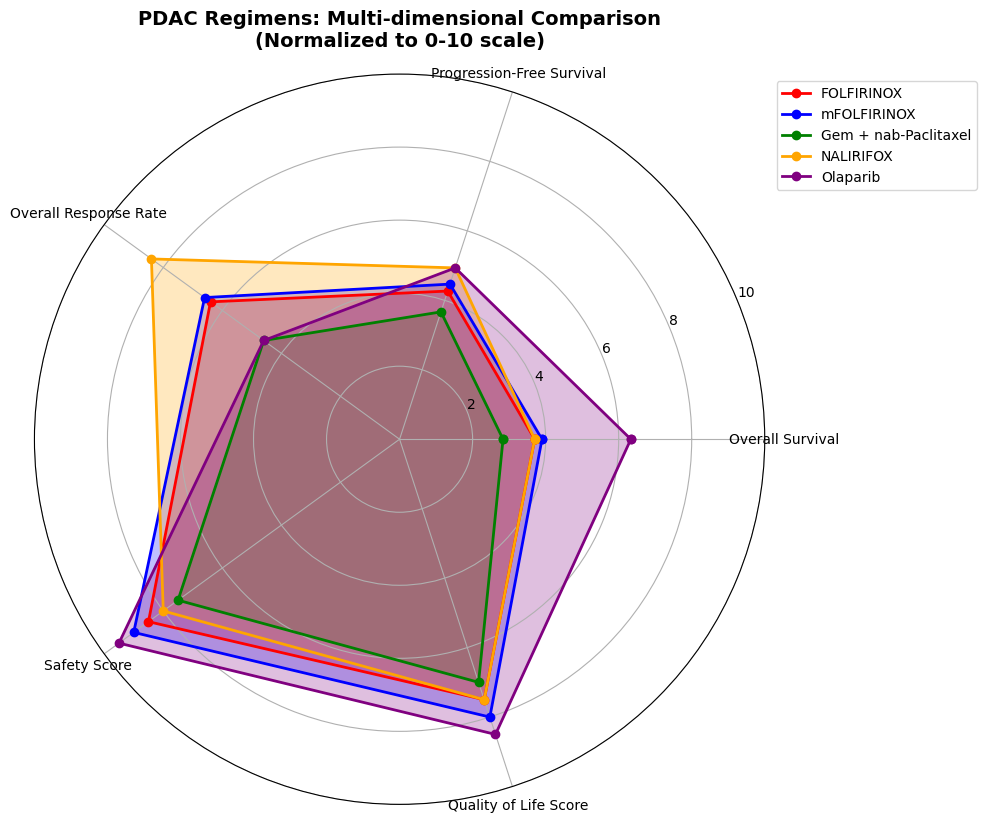

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Select key regimens for comparison
regimens_data = {
    'FOLFIRINOX': [11.1, 6.4, 32, 8.5, 7.5],  # OS, PFS, ORR, Safety Score (10-toxicity), QoL Score
    'mFOLFIRINOX': [11.7, 6.7, 33, 9.0, 8.0],
    'Gem + nab-Paclitaxel': [8.5, 5.5, 23, 7.5, 7.0],
    'NALIRIFOX': [11.1, 7.4, 42, 8.0, 7.5],
    'Olaparib': [19.0, 7.4, 23, 9.5, 8.5]
}

# Categories for radar chart
categories = ['Overall Survival', 'Progression-Free Survival', 'Overall Response Rate',
              'Safety Score', 'Quality of Life Score']

# Normalize data to 0-10 scale for better visualization
def normalize_data(data):
    normalized = []
    max_values = [30, 15, 50, 10, 10]  # Max expected values for normalization
    for i, value in enumerate(data):
        normalized.append((value / max_values[i]) * 10)
    return normalized

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Number of variables
N = len(categories)

# Angles for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Colors for each regimen
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, (regimen, data) in enumerate(regimens_data.items()):
    values = normalize_data(data)
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=regimen, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 10)
ax.set_title('PDAC Regimens: Multi-dimensional Comparison\n(Normalized to 0-10 scale)',
             size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

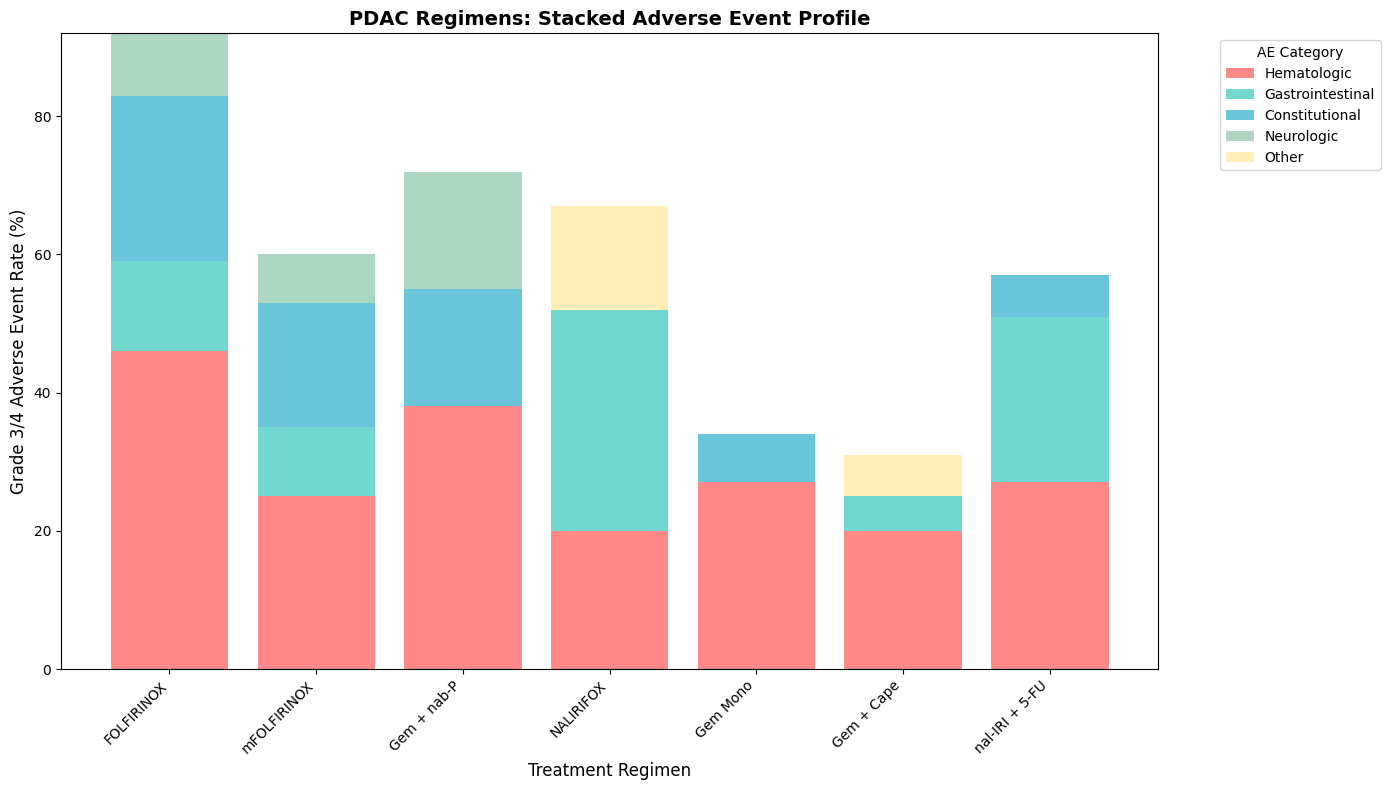

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create dataset focusing on different adverse event categories
ae_data = {
    'Regimen': ['FOLFIRINOX', 'mFOLFIRINOX', 'Gem + nab-P', 'NALIRIFOX',
                'Gem Mono', 'Gem + Cape', 'nal-IRI + 5-FU'],
    'Hematologic': [46, 25, 38, 20, 27, 20, 27],  # Neutropenia/thrombocytopenia
    'Gastrointestinal': [13, 10, 0, 32, 0, 5, 24],  # Diarrhea + nausea + vomiting
    'Constitutional': [24, 18, 17, 0, 7, 0, 6],  # Fatigue
    'Neurologic': [9, 7, 17, 0, 0, 0, 0],  # Neuropathy
    'Other': [0, 0, 0, 15, 0, 6, 0]  # Rash, HFS, etc.
}

df_ae = pd.DataFrame(ae_data)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

categories = ['Hematologic', 'Gastrointestinal', 'Constitutional', 'Neurologic', 'Other']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

bottom = np.zeros(len(df_ae))

for i, category in enumerate(categories):
    ax.bar(df_ae['Regimen'], df_ae[category], bottom=bottom,
           label=category, color=colors[i], alpha=0.8)
    bottom += df_ae[category]

ax.set_xlabel('Treatment Regimen', fontsize=12)
ax.set_ylabel('Grade 3/4 Adverse Event Rate (%)', fontsize=12)
ax.set_title('PDAC Regimens: Stacked Adverse Event Profile', fontsize=14, fontweight='bold')
ax.legend(title='AE Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

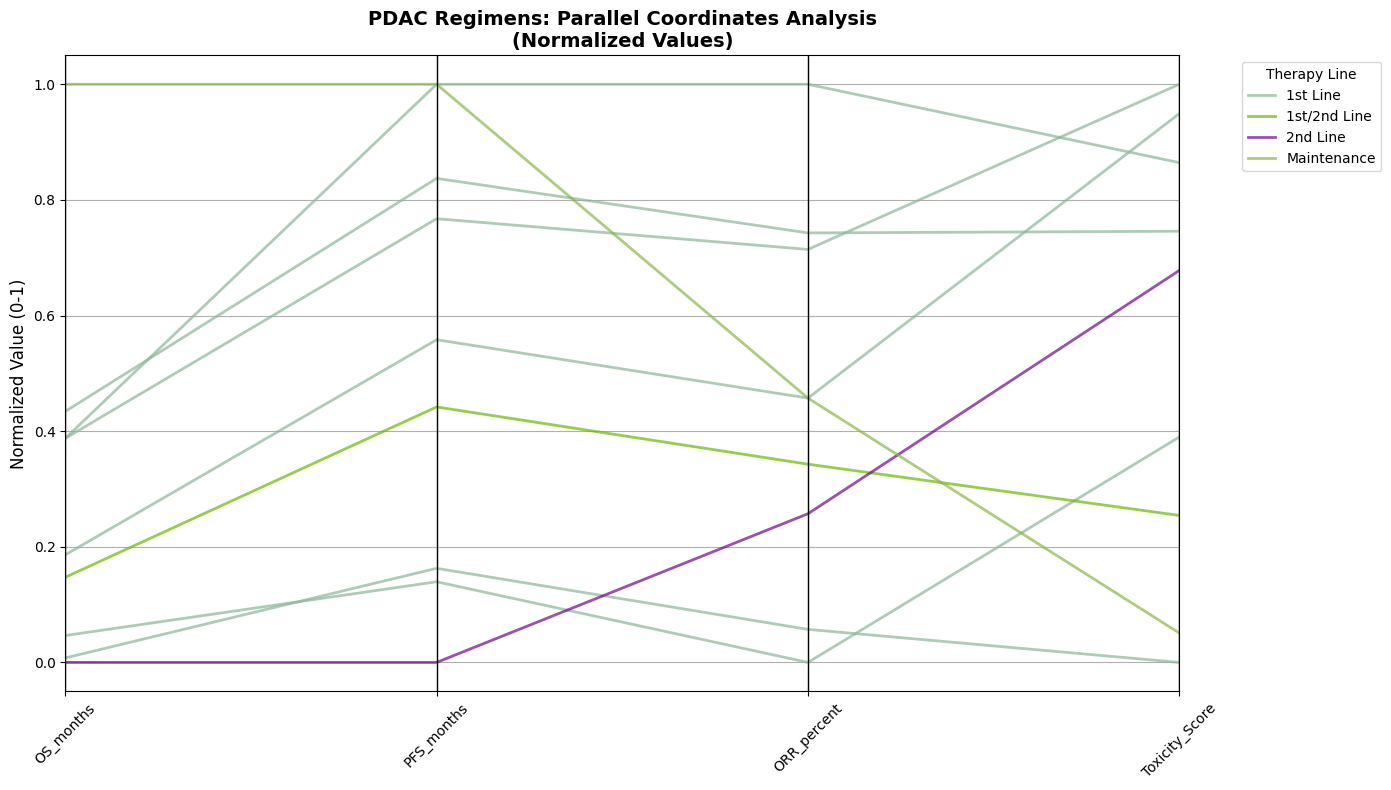

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np

# Create comprehensive dataset
data = {
    'Regimen': ['FOLFIRINOX', 'mFOLFIRINOX', 'Gem + nab-Paclitaxel', 'NALIRIFOX',
                'Gemcitabine Mono', 'Gem + Capecitabine', 'Gem + Erlotinib',
                'nal-IRI + 5-FU/LV', 'Olaparib'],
    'OS_months': [11.1, 11.7, 8.5, 11.1, 6.7, 8.0, 6.2, 6.1, 19.0],
    'PFS_months': [6.4, 6.7, 5.5, 7.4, 3.7, 5.0, 3.8, 3.1, 7.4],
    'ORR_percent': [32, 33, 23, 42, 7, 19, 9, 16, 23],
    'Toxicity_Score': [7.5, 6.0, 7.2, 6.7, 3.9, 3.1, 1.6, 5.6, 1.9],  # Derived from AE rates
    'Line_Category': ['1st Line', '1st Line', '1st Line', '1st Line', '1st Line',
                     '1st/2nd Line', '1st Line', '2nd Line', 'Maintenance']
}

df = pd.DataFrame(data)

# Normalize data for better visualization
numeric_cols = ['OS_months', 'PFS_months', 'ORR_percent', 'Toxicity_Score']
df_norm = df.copy()
for col in numeric_cols:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Create parallel coordinates plot
plt.figure(figsize=(14, 8))
parallel_coordinates(df_norm, 'Line_Category', cols=numeric_cols,
                    alpha=0.7, linewidth=2)
plt.title('PDAC Regimens: Parallel Coordinates Analysis\n(Normalized Values)',
          fontsize=14, fontweight='bold')
plt.ylabel('Normalized Value (0-1)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Therapy Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

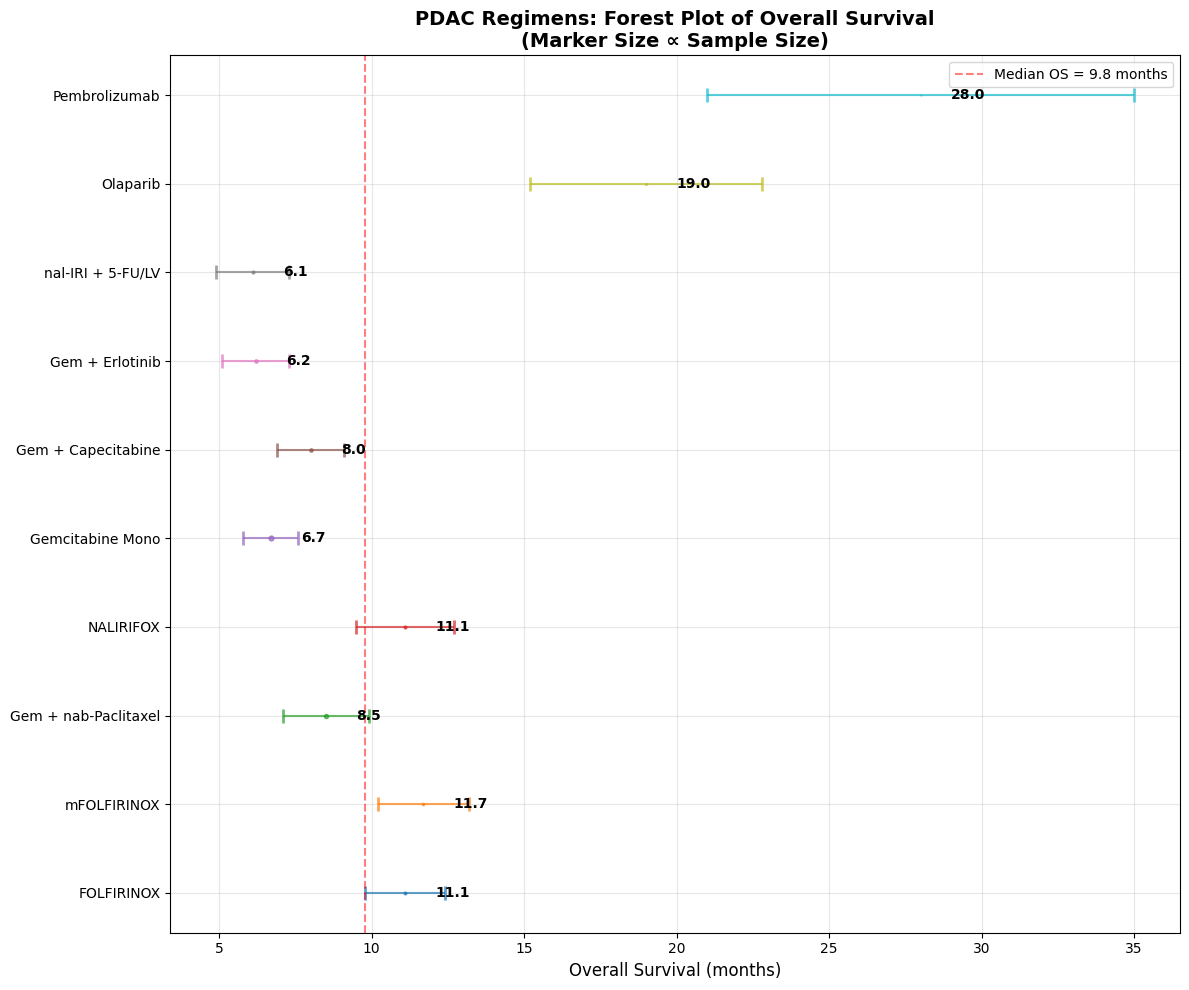

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create dataset with confidence intervals (simulated based on typical ranges)
forest_data = {
    'Regimen': ['FOLFIRINOX', 'mFOLFIRINOX', 'Gem + nab-Paclitaxel', 'NALIRIFOX',
                'Gemcitabine Mono', 'Gem + Capecitabine', 'Gem + Erlotinib',
                'nal-IRI + 5-FU/LV', 'Olaparib', 'Pembrolizumab'],
    'OS_mean': [11.1, 11.7, 8.5, 11.1, 6.7, 8.0, 6.2, 6.1, 19.0, 28.0],
    'OS_lower': [9.8, 10.2, 7.1, 9.5, 5.8, 6.9, 5.1, 4.9, 15.2, 21.0],
    'OS_upper': [12.4, 13.2, 9.9, 12.7, 7.6, 9.1, 7.3, 7.3, 22.8, 35.0],
    'Sample_Size': [342, 256, 861, 383, 1200, 533, 569, 417, 154, 32]
}

df_forest = pd.DataFrame(forest_data)

# Create forest plot
fig, ax = plt.subplots(figsize=(12, 10))

y_pos = np.arange(len(df_forest))

# Plot confidence intervals
for i, row in df_forest.iterrows():
    ax.errorbar(row['OS_mean'], i,
                xerr=[[row['OS_mean'] - row['OS_lower']], [row['OS_upper'] - row['OS_mean']]],
                fmt='o', capsize=5, capthick=2,
                markersize=np.sqrt(row['Sample_Size'])/10, alpha=0.7)

# Add mean values as text
for i, row in df_forest.iterrows():
    ax.text(row['OS_mean'] + 1, i, f"{row['OS_mean']:.1f}",
            va='center', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_forest['Regimen'])
ax.set_xlabel('Overall Survival (months)', fontsize=12)
ax.set_title('PDAC Regimens: Forest Plot of Overall Survival\n(Marker Size ∝ Sample Size)',
             fontsize=14, fontweight='bold')
ax.axvline(x=df_forest['OS_mean'].median(), color='red', linestyle='--', alpha=0.5,
           label=f'Median OS = {df_forest["OS_mean"].median():.1f} months')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

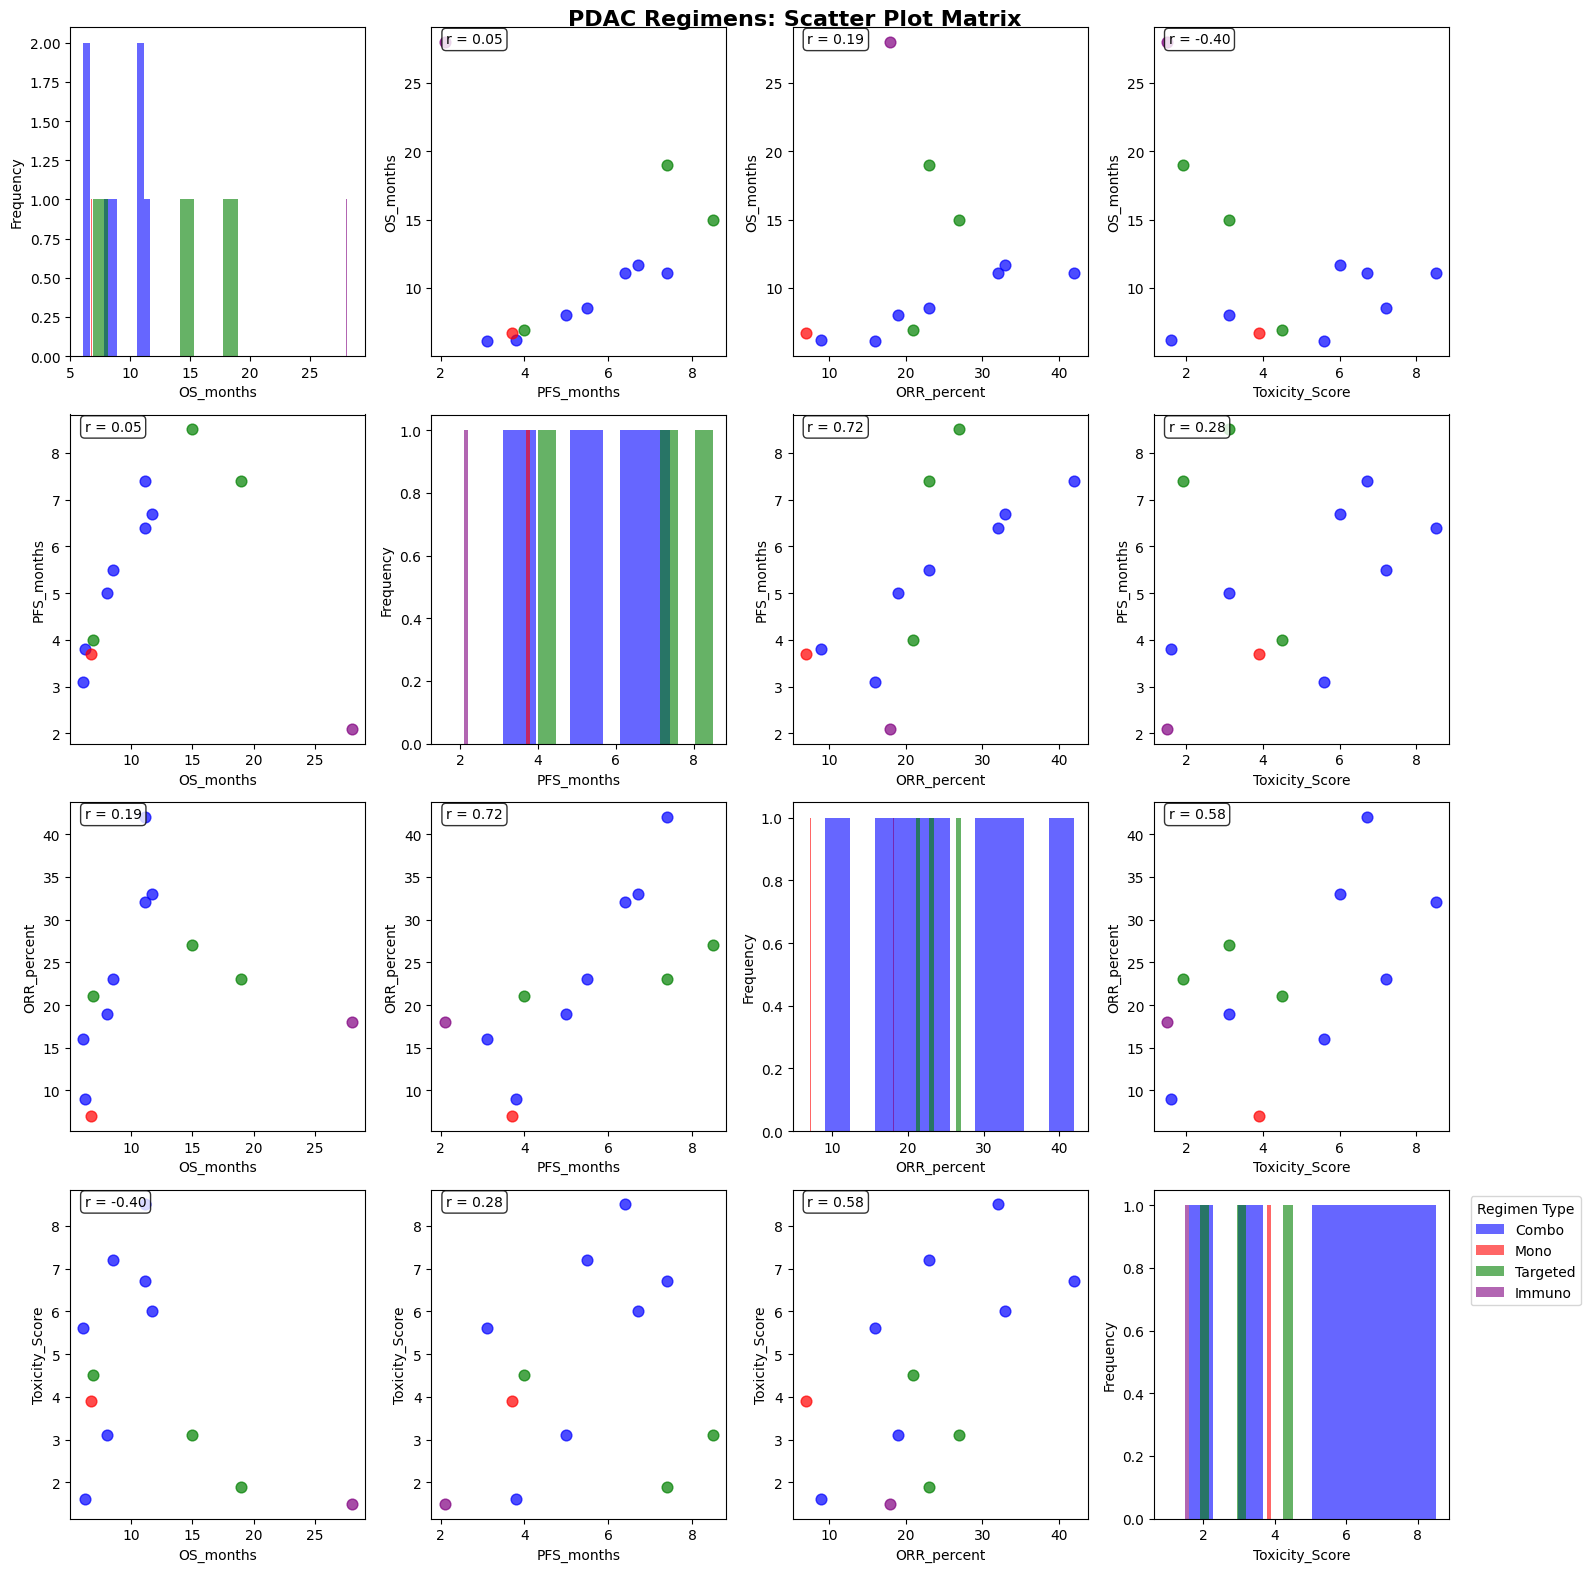

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create dataset
data = {
    'OS_months': [11.1, 11.7, 8.5, 11.1, 6.7, 8.0, 6.2, 6.1, 19.0, 28.0, 6.9, 15.0],
    'PFS_months': [6.4, 6.7, 5.5, 7.4, 3.7, 5.0, 3.8, 3.1, 7.4, 2.1, 4.0, 8.5],
    'ORR_percent': [32, 33, 23, 42, 7, 19, 9, 16, 23, 18, 21, 27],
    'Toxicity_Score': [8.5, 6.0, 7.2, 6.7, 3.9, 3.1, 1.6, 5.6, 1.9, 1.5, 4.5, 3.1],
    'Regimen_Type': ['Combo', 'Combo', 'Combo', 'Combo', 'Mono', 'Combo', 'Combo',
                     'Combo', 'Targeted', 'Immuno', 'Targeted', 'Targeted']
}

df_scatter = pd.DataFrame(data)

# Create scatter plot matrix
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
variables = ['OS_months', 'PFS_months', 'ORR_percent', 'Toxicity_Score']
colors = {'Combo': 'blue', 'Mono': 'red', 'Targeted': 'green', 'Immuno': 'purple'}

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            for reg_type in df_scatter['Regimen_Type'].unique():
                data_subset = df_scatter[df_scatter['Regimen_Type'] == reg_type][var1]
                ax.hist(data_subset, alpha=0.6, label=reg_type, color=colors[reg_type])
            ax.set_xlabel(var1)
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: scatter plot
            for reg_type in df_scatter['Regimen_Type'].unique():
                mask = df_scatter['Regimen_Type'] == reg_type
                ax.scatter(df_scatter[mask][var2], df_scatter[mask][var1],
                          alpha=0.7, label=reg_type, color=colors[reg_type], s=60)
            ax.set_xlabel(var2)
            ax.set_ylabel(var1)

            # Add correlation coefficient
            corr = df_scatter[var1].corr(df_scatter[var2])
            ax.text(0.05, 0.95, f'r = {corr:.2f}', transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add legend to the last subplot
axes[-1, -1].legend(title='Regimen Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('PDAC Regimens: Scatter Plot Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

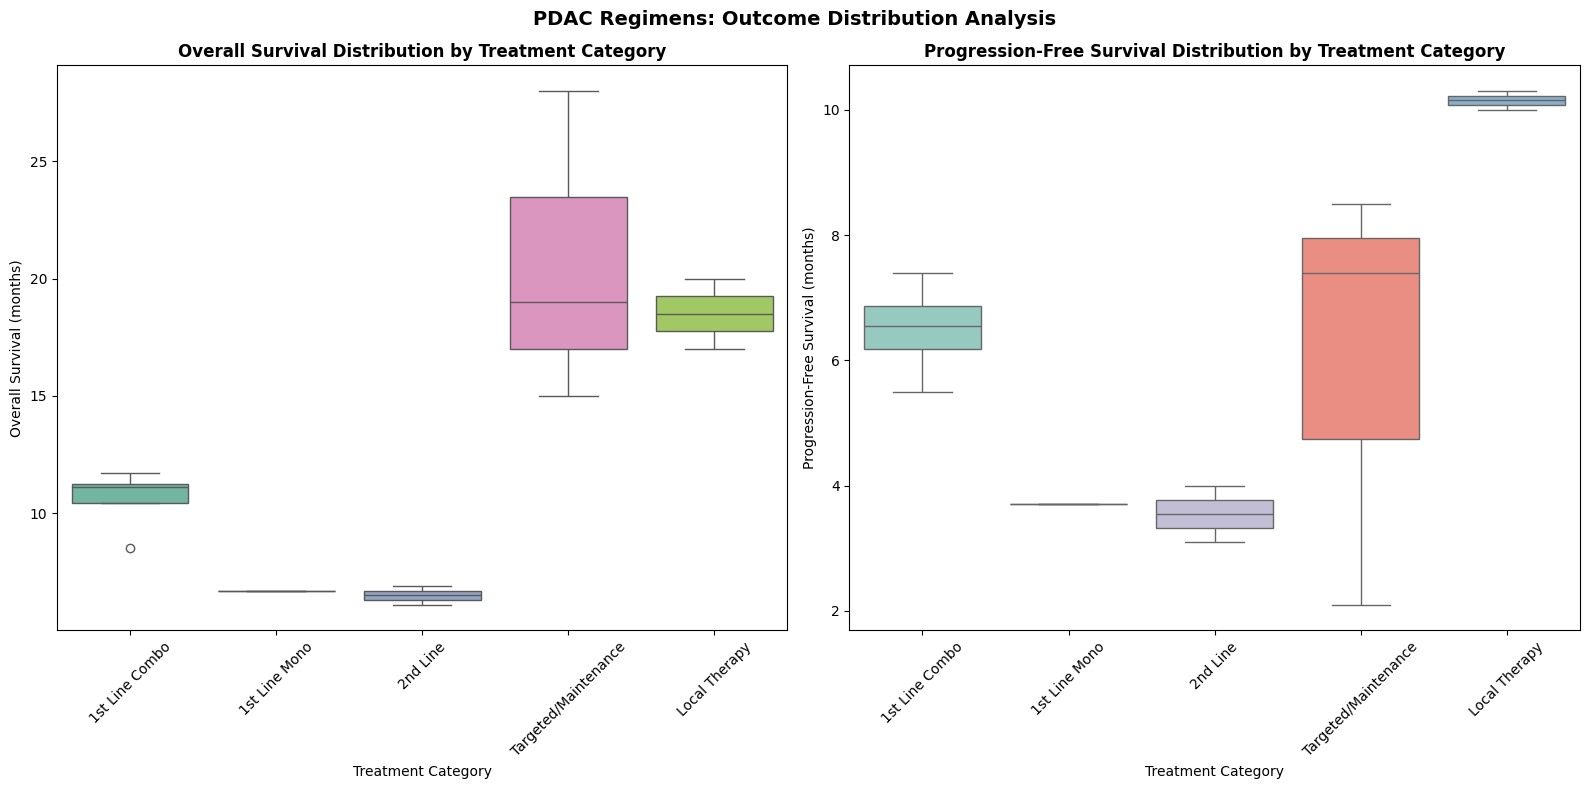

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create expanded dataset with multiple data points per regimen category
np.random.seed(42)
data_expanded = []

regimen_categories = {
    '1st Line Combo': {'OS': [11.1, 11.7, 8.5, 11.1], 'PFS': [6.4, 6.7, 5.5, 7.4]},
    '1st Line Mono': {'OS': [6.7], 'PFS': [3.7]},
    '2nd Line': {'OS': [6.1, 6.9], 'PFS': [3.1, 4.0]},
    'Targeted/Maintenance': {'OS': [19.0, 28.0, 15.0], 'PFS': [7.4, 2.1, 8.5]},
    'Local Therapy': {'OS': [20.0, 17.0], 'PFS': [10.3, 10.0]}
}

# Create DataFrame for box plots
box_data = []
for category, outcomes in regimen_categories.items():
    for os_val in outcomes['OS']:
        box_data.append({'Category': category, 'Outcome': 'Overall Survival', 'Value': os_val})
    for pfs_val in outcomes['PFS']:
        box_data.append({'Category': category, 'Outcome': 'Progression-Free Survival', 'Value': pfs_val})

df_box = pd.DataFrame(box_data)

# Create box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Box plot for OS
os_data = df_box[df_box['Outcome'] == 'Overall Survival']
sns.boxplot(data=os_data, x='Category', y='Value', ax=ax1, palette='Set2')
ax1.set_title('Overall Survival Distribution by Treatment Category', fontsize=12, fontweight='bold')
ax1.set_xlabel('Treatment Category', fontsize=10)
ax1.set_ylabel('Overall Survival (months)', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Box plot for PFS
pfs_data = df_box[df_box['Outcome'] == 'Progression-Free Survival']
sns.boxplot(data=pfs_data, x='Category', y='Value', ax=ax2, palette='Set3')
ax2.set_title('Progression-Free Survival Distribution by Treatment Category', fontsize=12, fontweight='bold')
ax2.set_xlabel('Treatment Category', fontsize=10)
ax2.set_ylabel('Progression-Free Survival (months)', fontsize=10)
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('PDAC Regimens: Outcome Distribution Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Create data for Sankey diagram
# Define the flow: Population -> Line of Therapy -> Regimen -> Outcome Category

# Nodes
labels = [
    # Population types (0-3)
    "Metastatic Fit", "Metastatic/LAPC", "Advanced PDAC", "Biomarker Selected",
    # Line of therapy (4-7)
    "1st Line", "2nd Line", "Maintenance", "Consolidation",
    # Outcome categories (8-11)
    "High Efficacy (OS>10mo)", "Moderate Efficacy (OS 6-10mo)",
    "Low Efficacy (OS<6mo)", "Exceptional Response (OS>15mo)"
]

# Define connections (source, target, value)
sankey_data = [
    # Population to Line of Therapy
    (0, 4, 4),   # Metastatic Fit -> 1st Line
    (1, 4, 2),   # Metastatic/LAPC -> 1st Line
    (2, 4, 2),   # Advanced PDAC -> 1st Line
    (0, 5, 2),   # Metastatic Fit -> 2nd Line
    (3, 6, 2),   # Biomarker Selected -> Maintenance
    (1, 7, 2),   # Metastatic/LAPC -> Consolidation

    # Line of Therapy to Outcomes
    (4, 8, 4),   # 1st Line -> High Efficacy
    (4, 9, 4),   # 1st Line -> Moderate Efficacy
    (5, 9, 1),   # 2nd Line -> Moderate Efficacy
    (5, 10, 1),  # 2nd Line -> Low Efficacy
    (6, 11, 2),  # Maintenance -> Exceptional Response
    (7, 11, 2),  # Consolidation -> Exceptional Response
]

source = [item[0] for item in sankey_data]
target = [item[1] for item in sankey_data]
value = [item[2] for item in sankey_data]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = ["lightblue", "lightgreen", "lightcoral", "lightyellow",
                "orange", "red", "purple", "brown",
                "darkgreen", "gold", "gray", "darkblue"]
    ),
    link = dict(
        source = source,
        target = target,
        value = value,
        color = "rgba(0,0,255,0.3)"
    )
)])

fig.update_layout(
    title_text="PDAC Treatment Flow: Population → Therapy Line → Outcomes",
    font_size=12,
    width=1200,
    height=600
)

fig.show()

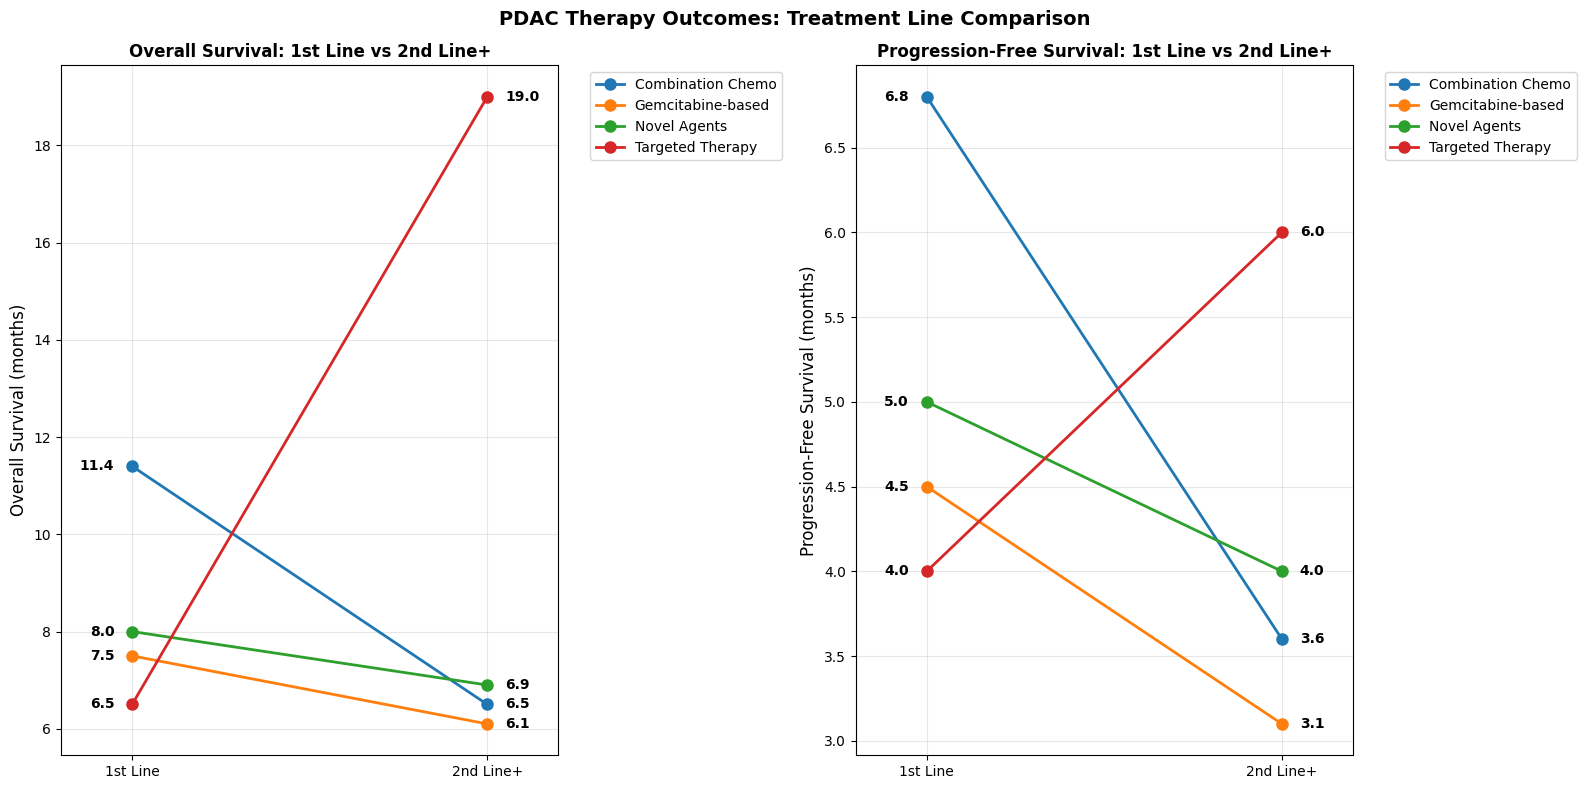

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create dataset comparing 1st line vs 2nd line therapies
slope_data = {
    'Therapy': ['Combination Chemo', 'Gemcitabine-based', 'Novel Agents', 'Targeted Therapy'],
    'First_Line_OS': [11.4, 7.5, 8.0, 6.5],      # Average OS for 1st line
    'Second_Line_OS': [6.5, 6.1, 6.9, 19.0],     # Average OS for 2nd line (includes maintenance)
    'First_Line_PFS': [6.8, 4.5, 5.0, 4.0],     # Average PFS for 1st line
    'Second_Line_PFS': [3.6, 3.1, 4.0, 6.0]     # Average PFS for 2nd line
}

df_slope = pd.DataFrame(slope_data)

# Create slope graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# OS Slope Graph
for i, row in df_slope.iterrows():
    ax1.plot([1, 2], [row['First_Line_OS'], row['Second_Line_OS']],
             'o-', linewidth=2, markersize=8, label=row['Therapy'])

    # Add value labels
    ax1.text(0.95, row['First_Line_OS'], f"{row['First_Line_OS']:.1f}",
             ha='right', va='center', fontweight='bold')
    ax1.text(2.05, row['Second_Line_OS'], f"{row['Second_Line_OS']:.1f}",
             ha='left', va='center', fontweight='bold')

ax1.set_xlim(0.8, 2.2)
ax1.set_xticks([1, 2])
ax1.set_xticklabels(['1st Line', '2nd Line+'])
ax1.set_ylabel('Overall Survival (months)', fontsize=12)
ax1.set_title('Overall Survival: 1st Line vs 2nd Line+', fontsize=12, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# PFS Slope Graph
for i, row in df_slope.iterrows():
    ax2.plot([1, 2], [row['First_Line_PFS'], row['Second_Line_PFS']],
             'o-', linewidth=2, markersize=8, label=row['Therapy'])

    # Add value labels
    ax2.text(0.95, row['First_Line_PFS'], f"{row['First_Line_PFS']:.1f}",
             ha='right', va='center', fontweight='bold')
    ax2.text(2.05, row['Second_Line_PFS'], f"{row['Second_Line_PFS']:.1f}",
             ha='left', va='center', fontweight='bold')

ax2.set_xlim(0.8, 2.2)
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['1st Line', '2nd Line+'])
ax2.set_ylabel('Progression-Free Survival (months)', fontsize=12)
ax2.set_title('Progression-Free Survival: 1st Line vs 2nd Line+', fontsize=12, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.suptitle('PDAC Therapy Outcomes: Treatment Line Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()